Importing libraries for data manipulation and visualization.

In [210]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat


Reading the csv file into a dataframe.Upon investigation, I found some of the entries to be incomplete by limited evidence. Then each column of the dataframe is tranformed into a series for accessibilty.

In [211]:

db = pd.read_csv('DataBreaches(2004-2021).csv')
db.drop(db.loc[db['Organization type']=='personal and demographic data about residents and their properties of US'].index, inplace=True)
db.drop(db.loc[db['Entity'] == 'Unknown agency(believed to be tied to United States Census Bureau)'].index, inplace=True)
db.drop(db.loc[db['Entity'] == 'Massive American business hack including 7-Eleven and Nasdaq'].index, inplace=True)
db.drop(db.loc[db['Method']=='intentionally lost'].index, inplace=True)
db.drop(db.loc[db['Method']=='misconfiguration/poor security'].index, inplace=True)
db.drop(db.loc[db['Method']=='unknown'].index, inplace=True)
db.drop(db.loc[db['Method']=='improper setting, hacked'].index,inplace=True)

#I changed the method of this entry because I found supported articles that argues against the reported value.
db_se = db.loc[(db['Method']=='poor security/inside job') & (db['Entity']=='Marriott International')].index.item()
db.loc[db_se,'Method'] = 'social engineering'

company=db['Entity']
year=db['Year']
records=db['Records']
organization_type=db['Organization type']
method = db['Method']

#I changed the year of two enties for consistency and based on public discovery 
clean_year=year.replace('2018-2019',2019)
clean_year=clean_year.replace('2014 and 2015',2015).astype(int)
db['Year'] = clean_year
year = db['Year']



I found that my dataset has 266 unique companies with 48 types of orgranizations.   

In [212]:
company_num_unique=len(company.unique())
organization_type_num_unique=len(organization_type.unique())
print('The number of unique companies breached:',company_num_unique)
print('The number of unique types of organizations:', organization_type_num_unique)

avg = stat.mean(records)
print('The average of compromised records:',avg,'\n')

yearly_avg=db.groupby('Year')['Records'].mean().to_frame().reset_index()
#print(yearly_avg,'\n')

#for year in year.value_counts().index:
#    print(yearly_avg,'\n')

#db_avg = pd.DataFrame(data=db.groupby('Year')['Records'].mean(), columns=['Year','Average'])
#print(db_avg)

for company in company.value_counts()[lambda x: x >= 2].index:
    print(company)
print('\n')
  
#for company in company:
#    if records.value_counts()[lambda x: x > 1000000].index:
#        print(company)

for record, company in zip(records,db['Entity']):
    if record > 100000000:
        print(company)



The number of unique companies breached: 266
The number of unique types of organizations: 48
The average of compromised records: 42436654.23239437 

Facebook
Citigroup
AOL
Yahoo
Countrywide Financial Corp
Bell Canada
Uber
TD Ameritrade
AT&T
Marriott International
University of California, Berkeley
MongoDB
JP Morgan Chase


Adobe Systems Incorporated
Airtel
Canva
Capital One
eBay
ElasticSearch
Equifax
Exactis
Facebook
Facebook
First American Corporation
Friend Finder Networks
Heartland
Instagram
Marriott International
Microsoft
MongoDB
MongoDB
Target Corporation
Tetrad
Under Armour
Wattpad
Yahoo
Yahoo
Zynga


The series_replace function replaces a number of strings with a given a string. The series_query function prints the companies' names when the method or organization type is found within the dataset.

In [213]:

def series_replace(db_data,cate,string):
    '''A function that replaces a number of strings with a given a string'''
    data_mod=db_data.replace(cate,string).str.lower()
    data_mod.sort_values(inplace = True)
    return data_mod

def series_query(series,db_data,string):
    '''A function that prints the companies' names when the method or organization type is found within the dataset'''
    for var, company in zip(series,db_data):
        if var == string:
            print(company)
    return
    

In an effort to clean up the data, I researched some of the data beaches in order to see if the reported method is accurate versus non-wikipedia articles.This is a plot that shows the number of occurrences per the method of breach. As it is shown in the graph, hacking is the most popular method for a data breach between 2004-2021. On the other side, an accidental upload or unprotected api is the least popular method.

Text(0.5, 1.0, 'Number of Occurrences vs Method of the Breach')

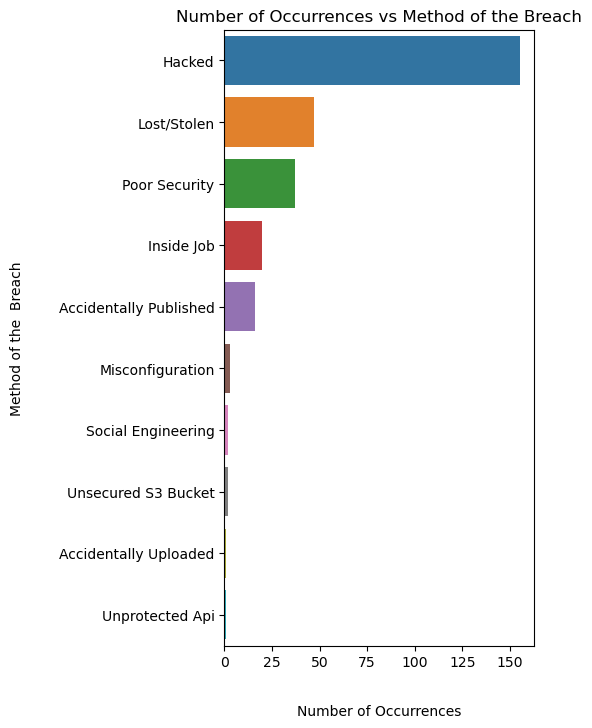

In [214]:

method=series_replace(db['Method'],['publicly accessible Amazon Web Services (AWS) server'],'unsecured S3 bucket')
method=series_replace(method,['accidentally exposed','data exposed by misconfiguration','rogue contractor'],'misconfiguration')
method=series_replace(method,['poor security / hacked'],'poor security')
method=series_replace(method,['inside job, hacked','poor security/inside job'],'inside job')
method=series_replace(method,['lost / stolen media','lost / stolen computer'],'lost/stolen')
method = pd.Series([i.title()for i in method])

plt.figure(figsize=(4,8))
sns.countplot(y=method.values,order=method.value_counts().index)
plt.ylabel('Method of the  Breach',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Method of the Breach')


In an effort to clean up the data, I researched some of the companies in order to find their right type/industry.This is a plot that shows the number of occurrences per type of organization. As it is shown in the graph, healthcare edges out for web for the most popular type of organization. On the other side, there is five-way between advertising, fashion, data broker, ticket distribution, and market analysis for the least popular type of organization.

Text(0.5, 1.0, 'Number of Occurrences vs Type of Organization')

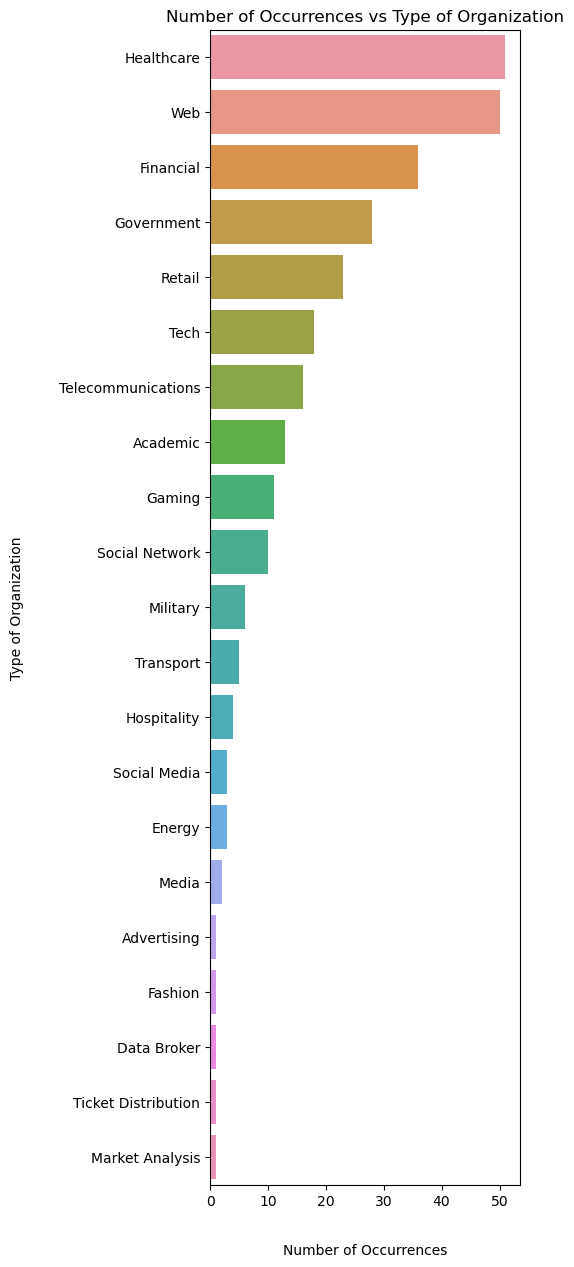

In [215]:

organization_type=series_replace(db['Organization type'],['telecoms','telecom','mobile carrier','online marketing'],'telecommunications')
organization_type=series_replace(organization_type,['tech, retail','tech, web','local search'],'tech')
organization_type=series_replace(organization_type,['government, database','government, military','military, healthcare','government, healthcare','clinical laboratory'],'healthcare')
organization_type=series_replace(organization_type,['financial service company','financial, credit reporting','banking'],'financial')
organization_type=series_replace(organization_type,['game'],'gaming')
organization_type=series_replace(organization_type,['special public corporation'],'government')
organization_type=series_replace(organization_type,['phone accessories','consumer goods','shopping'],'retail')
organization_type=series_replace(organization_type,['educational services'],'academic')
organization_type=series_replace(organization_type,['restaurant','hotel'],'hospitality')
organization_type=series_replace(organization_type,['web, gaming','web, military'],'web')
organization_type=series_replace(organization_type,['web, tech'],'social media')
organization_type=series_replace(organization_type,['question & answer','social networking'],'social network')

organization_type=pd.Series([i.title()for i in organization_type])

plt.figure(figsize=(4,15))
sns.countplot(y = organization_type.values,order=organization_type.value_counts().index)
plt.ylabel('Type of Organization',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Type of Organization')


This is a plot that shows the number of occurrences per year. As it is shown in the graph, the most amount of the data breaches occured in 2011 whereas, the least amount of the data breaches occured in 2004.   

Text(0.5, 1.0, 'Year of the Breach vs Number of Occurrences')

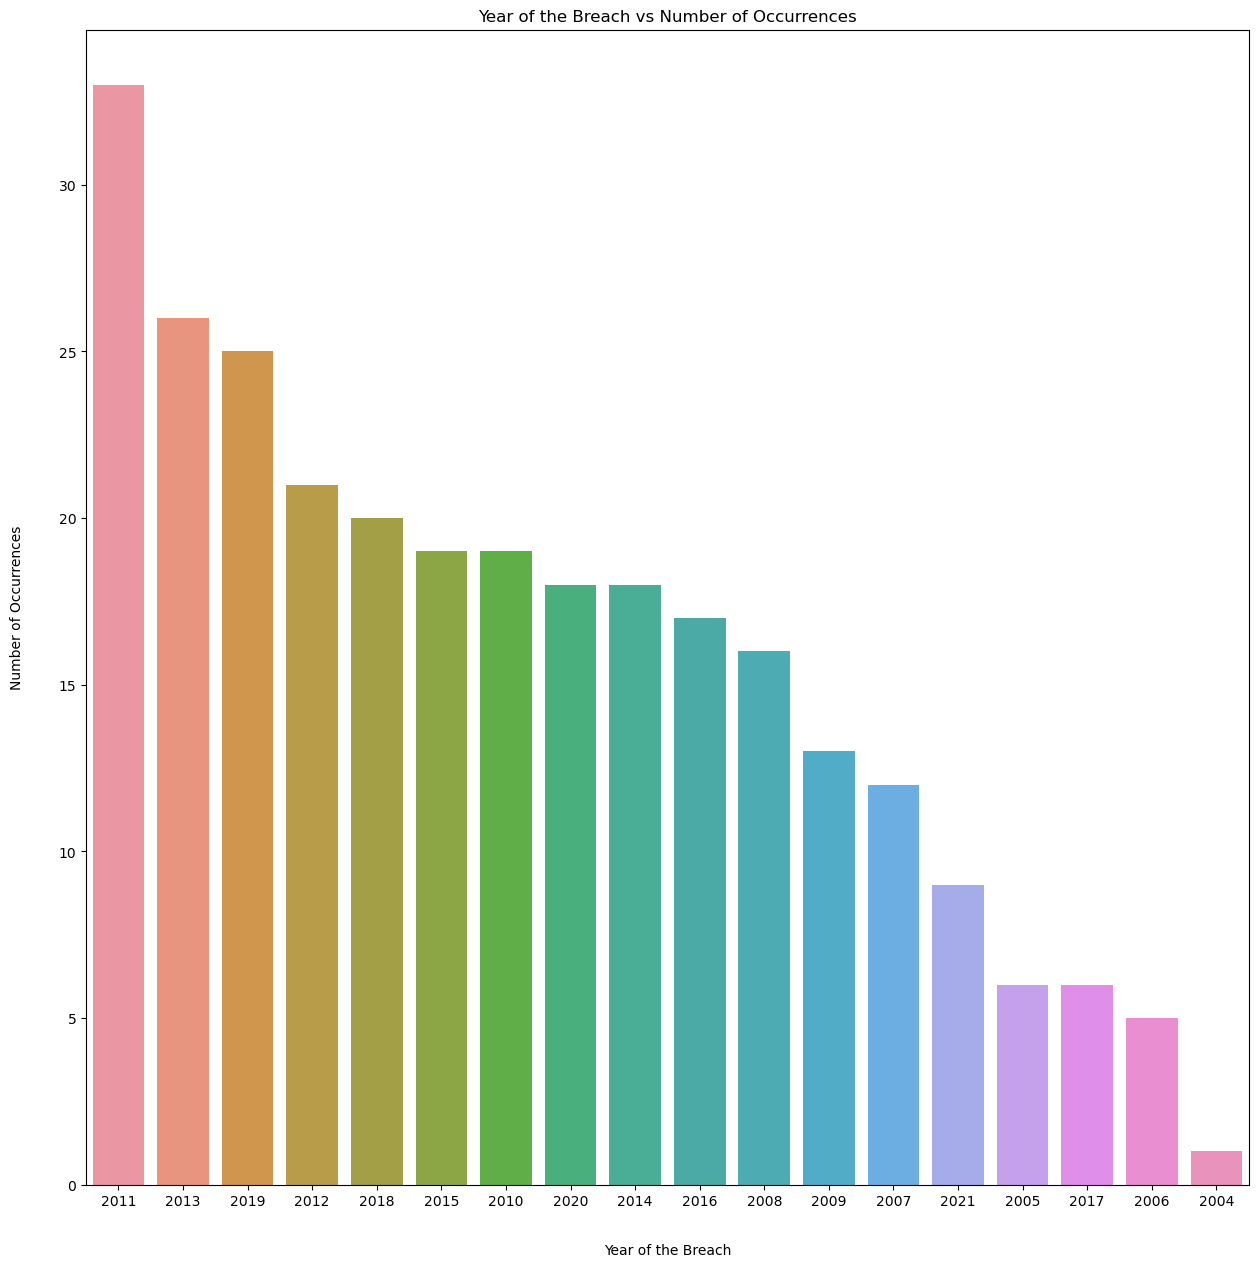

In [216]:
plt.figure(figsize=(15,15))
sns.countplot(x = year.values,order=year.value_counts().index)
plt.xlabel('Year of the Breach',labelpad=25)
plt.ylabel('Number of Occurrences',labelpad=25)
plt.title('Year of the Breach vs Number of Occurrences')


Text(0.5, 1.0, 'Year of the Breach vs Yearly Averages of compromised records')

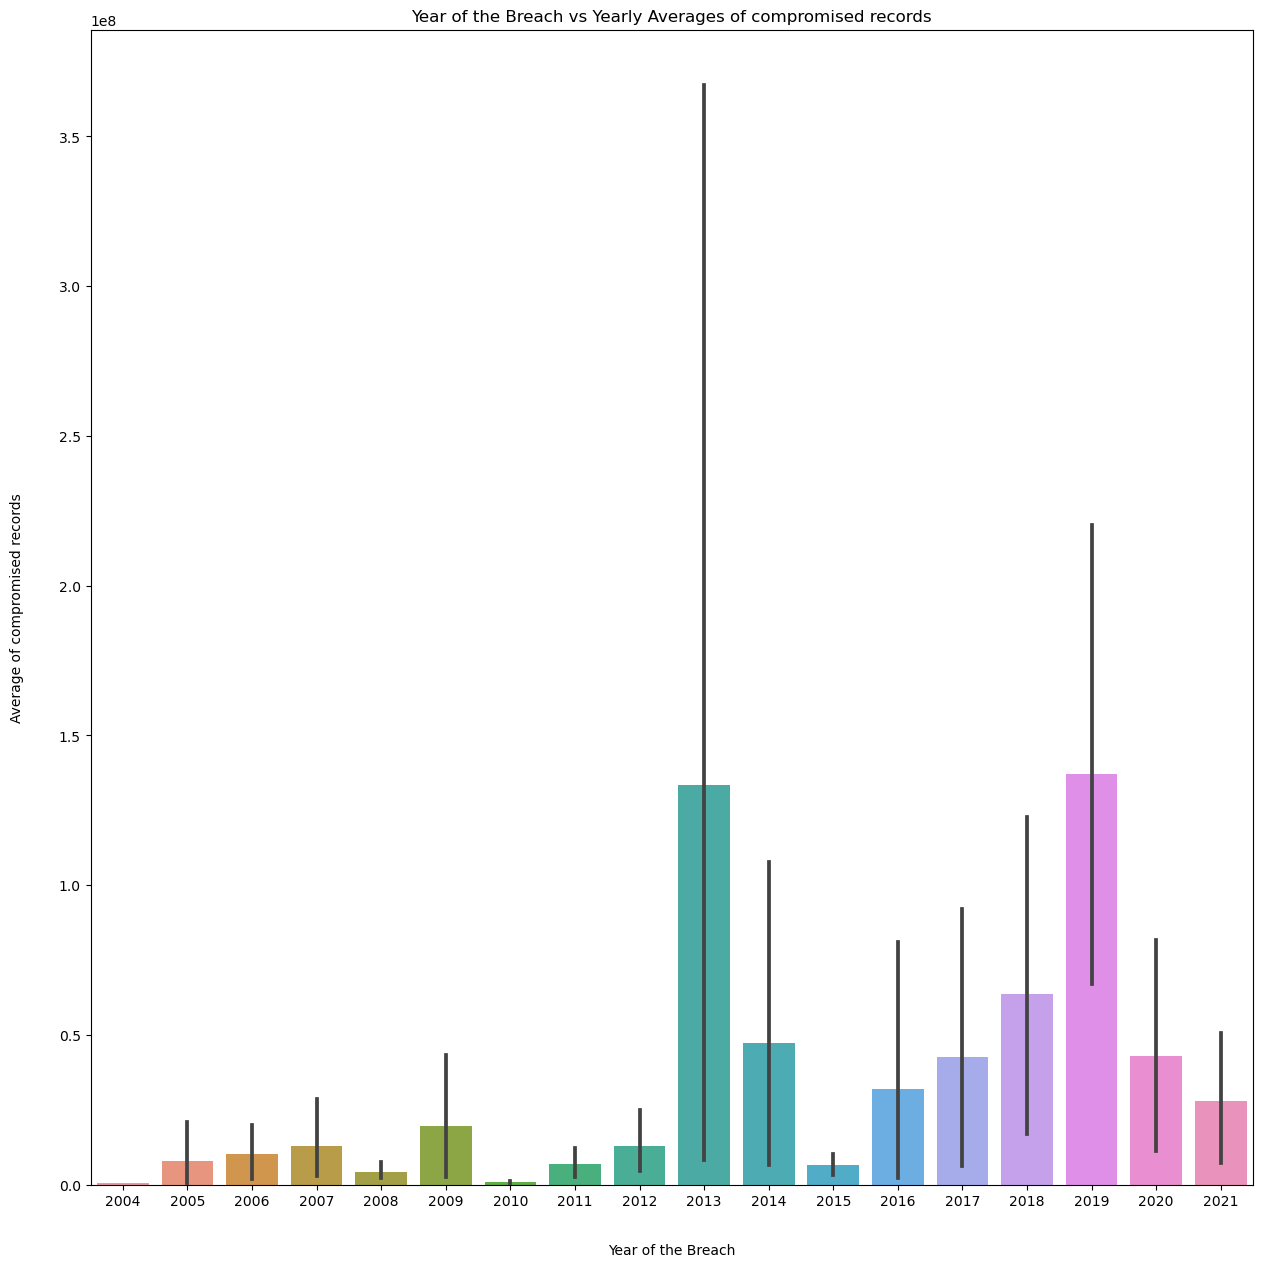

In [217]:
plt.figure(figsize=(15,15))
sns.barplot(x =year, y=records, data=yearly_avg)
plt.xlabel('Year of the Breach',labelpad=25)
plt.ylabel('Average of compromised records',labelpad=25)
plt.title('Year of the Breach vs Yearly Averages of compromised records')